# Capstone

---
### Problem Statement:

**Which players are predicted to be future talents after 2017?**

---

### Goal:

- Clustering using rankings and results to group players into performance groups
- Use stats of players to group them into clusters to predict performance


### Imports

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
### Read in data

In [359]:
df_scores = pd.read_csv('./datasets/match_scores_2017_unindexed_csv.csv')
df_stats = pd.read_csv('./datasets/match_stats_2017_unindexed_csv.csv')
df_rankings = pd.read_csv('./datasets/rankings_2017.csv')

In [360]:
print(df_scores.columns)
df_scores.head(2)

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')


,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Finals,1,1,Grigor Dimitrov,d875,grigor-dimitrov,...,3,62 26 63,2,1,14,11,0,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats
1,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,1,Grigor Dimitrov,d875,grigor-dimitrov,...,1,76(7) 62,2,0,13,8,1,0,2017-339-d875-r975,/en/scores/2017/339/MS002/match-stats


In [361]:
print(df_stats.columns)
df_stats.head(2)

Index(['tourney_order', 'match_id', 'match_stats_url_suffix', 'match_time',
       'match_duration', 'winner_aces', 'winner_double_faults',
       'winner_first_serves_in', 'winner_first_serves_total',
       'winner_first_serve_points_won', 'winner_first_serve_points_total',
       'winner_second_serve_points_won', 'winner_second_serve_points_total',
       'winner_break_points_saved', 'winner_break_points_serve_total',
       'winner_service_points_won', 'winner_service_points_total',
       'winner_first_serve_return_won', 'winner_first_serve_return_total',
       'winner_second_serve_return_won', 'winner_second_serve_return_total',
       'winner_break_points_converted', 'winner_break_points_return_total',
       'winner_service_games_played', 'winner_return_games_played',
       'winner_return_points_won', 'winner_return_points_total',
       'winner_total_points_won', 'winner_total_points_total', 'loser_aces',
       'loser_double_faults', 'loser_first_serves_in',
       'loser_f

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,2017-339-r975-n409,/en/scores/2017/339/MS004/match-stats,02:21:00,141,23,3,62,97,50,...,19,35,1,7,14,15,31,97,84,181
1,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats,01:49:00,109,7,2,52,77,41,...,13,25,2,7,12,13,24,77,69,146


In [362]:
# look for columns with null values and drop

df_scores.drop(columns = 'match_stats_url_suffix', inplace = True) # can I filter by columsn that have missing values?

---
### EDA

In [363]:
# Look at 1st serve and 2nd serve percentages
df_stats.dtypes

tourney_order                        int64
match_id                            object
match_stats_url_suffix              object
match_time                          object
match_duration                       int64
winner_aces                          int64
winner_double_faults                 int64
winner_first_serves_in               int64
winner_first_serves_total            int64
winner_first_serve_points_won        int64
winner_first_serve_points_total      int64
winner_second_serve_points_won       int64
winner_second_serve_points_total     int64
winner_break_points_saved            int64
winner_break_points_serve_total      int64
winner_service_points_won            int64
winner_service_points_total          int64
winner_first_serve_return_won        int64
winner_first_serve_return_total      int64
winner_second_serve_return_won       int64
winner_second_serve_return_total     int64
winner_break_points_converted        int64
winner_break_points_return_total     int64
winner_serv

---
#### Winner vs Loser stats

In [364]:
# first serve percentage
avg_first_serve_in_win = (df_stats['winner_first_serves_in'] / df_stats['winner_first_serves_total']).mean()
avg_first_serve_in_lose = (df_stats['loser_first_serves_in'] / df_stats['loser_first_serves_total']).mean()

# first serve points won (percentage)
avg_first_serve_points_win = (df_stats['winner_first_serve_points_won'] / df_stats['winner_first_serve_points_total']).mean()
avg_first_serve_points_lose = (df_stats['loser_first_serve_points_won'] / df_stats['loser_first_serve_points_total']).mean()

# second serve points won (pecentage)
avg_second_serve_points_win = (df_stats['winner_second_serve_points_won'] / df_stats['winner_second_serve_points_total']).mean()
avg_second_serve_points_lose = (df_stats['loser_second_serve_points_won'] / df_stats['loser_second_serve_points_total']).mean()

# first serve return points won (percentage)
avg_first_return_points_win = (df_stats['winner_first_serve_return_won'] / df_stats['winner_first_serve_return_total']).mean()
avg_first_return_points_lose = (df_stats['loser_first_serve_return_won'] / df_stats['loser_first_serve_return_total']).mean()

# second serve return points won (percentage)
avg_second_return_points_win = (df_stats['winner_second_serve_return_won'] / df_stats['winner_second_serve_return_total']).mean()
avg_second_return_points_lose = (df_stats['loser_second_serve_return_won'] / df_stats['loser_second_serve_return_total']).mean()

#### Plots

In [365]:
# creates bar chart comparing winner vs loser
def plot_winner_loser(ax, bars, width = 0.35):
    '''
    Creates a bar chart comparing winner vs loser statistics. Used with subplots.
    - ax: subplot location
    - bars: list containting winner and loser stats
    - width: width of bars (default = 0.35)
    '''
    winner = ax.bar(0, bars[0], width, label = 'Winner')
    loser = ax.bar(width, bars[1], width, label = 'Loser')
    ax.set_ylim([0, 1]) # https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib

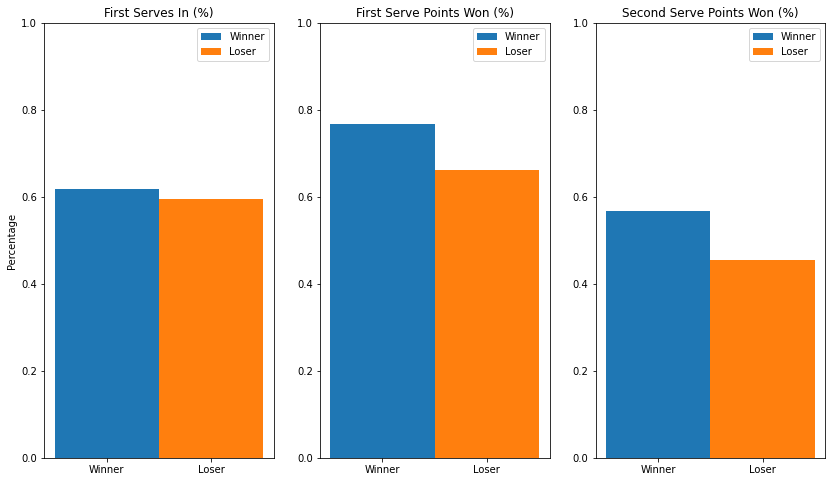

In [366]:
# instantiate plot
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (14,8))
width = 0.35


# plot first serve percentages -- winner vs loser
plot_winner_loser(ax1, [avg_first_serve_in_win, avg_first_serve_in_lose])
ax1.set_ylabel('Percentage')
ax1.set_title('First Serves In (%)')
ax1.set_xticks([0, width])
ax1.set_xticklabels(['Winner', 'Loser'])
ax1.legend()

# plot first serve point percentages -- winner vs loser
plot_winner_loser(ax2, [avg_first_serve_points_win, avg_first_serve_points_lose])
#ax2.set_ylabel('Percentage')
ax2.set_title('First Serve Points Won (%)')
ax2.set_xticks([0, width])
ax2.set_xticklabels(['Winner', 'Loser'])
ax2.legend()

# plot second serve point percentages -- winner vs loser
plot_winner_loser(ax3, [avg_second_serve_points_win, avg_second_serve_points_lose])
ax3.set_title('Second Serve Points Won (%)')
#ax3.set_ylabel('Percentage')
ax3.set_xticks([0, width])
ax3.set_xticklabels(['Winner', 'Loser'])
ax3.legend();


# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

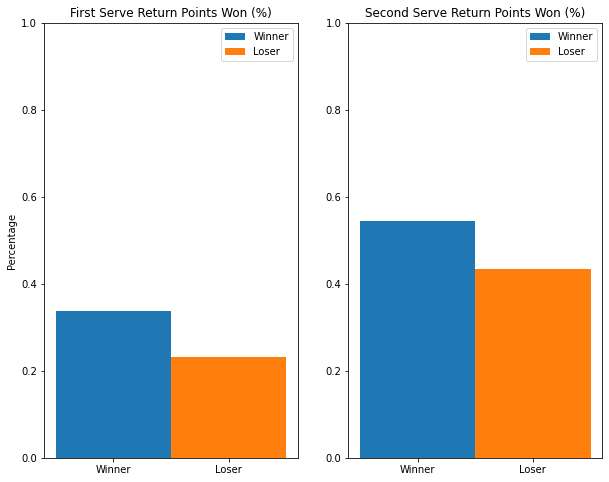

In [367]:
# instantiate plot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
width = 0.35


# plot first serve point percentages -- winner vs loser
plot_winner_loser(ax1, [avg_first_return_points_win, avg_first_return_points_lose])
ax1.set_title('First Serve Return Points Won (%)')
ax1.set_ylabel('Percentage')
ax1.set_xticks([0, width])
ax1.set_xticklabels(['Winner', 'Loser'])
ax1.legend()

# plot second serve point percentages -- winner vs loser
plot_winner_loser(ax2, [avg_second_return_points_win, avg_second_return_points_lose])
ax2.set_title('Second Serve Return Points Won (%)')
ax2.set_xticks([0, width])
ax2.set_xticklabels(['Winner', 'Loser'])
ax2.legend();

---

### Merging data

In [368]:
df = pd.merge(df_scores, df_stats, on = 'match_id')

In [369]:
df.groupby('winner_name')['winner_first_serve_points_won', 'winner_first_serve_points_total'].mean()

/Users/aidandominguez/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,winner_first_serve_points_won,winner_first_serve_points_total
winner_name,,
Adam Pavlasek,59.000000,70.000000
Adrian Bodmer,37.000000,42.000000
Adrian Mannarino,34.794872,48.897436
Adrian Menendez-Maceiras,33.000000,44.125000
Agustin Velotti,22.500000,31.500000
...,...,...
Yusuke Takahashi,22.000000,30.000000
Yuya Kibi,42.000000,60.000000
Zdenek Kolar,42.000000,58.000000


In [370]:
df.shape

(3798, 75)

In [371]:
# percentage of first serves made
df["winner_first_serve_pct"] = df["winner_first_serves_in"] / df["winner_first_serves_total"]

# percentage of first serve points won
df["winner_first_serve_win_pct"] = df["winner_first_serve_points_won"] / df["winner_first_serves_in"]

# percentage of service points won
df["winner_service_win_pct"] = df["winner_service_points_won"] / df["winner_service_points_total"]

In [372]:
# percentage of first serves made
df["loser_first_serve_pct"] = df["loser_first_serves_in"] / df["loser_first_serves_total"]

# percentage of first serve points won
df["loser_first_serve_win_pct"] = df["loser_first_serve_points_won"] / df["loser_first_serves_in"]

# percentage of service points won
df["loser_service_win_pct"] = df["loser_service_points_won"] / df["loser_service_points_total"]

In [373]:
df.shape

(3798, 81)

In [374]:
winner_serve_stats = df.groupby("winner_name")[
    ["winner_first_serve_pct", "winner_first_serve_win_pct", "winner_service_win_pct"]
].mean()

names = df.loc[:, ['winner_name', 'winner_player_id']].drop_duplicates()
names = names.set_index('winner_name')

winner_serve_stats = pd.merge(names, winner_serve_stats, on=names.index)

winner_serve_stats = winner_serve_stats.rename(columns={'key_0': 'player'}).set_index('player')

winner_serve_stats.head()

,winner_player_id,winner_first_serve_pct,winner_first_serve_win_pct,winner_service_win_pct
player,,,,
Grigor Dimitrov,d875,0.679612,0.842857,0.737864
Kei Nishikori,n552,0.583333,0.880952,0.708333
Milos Raonic,r975,0.608746,0.720023,0.656980
Stan Wawrinka,w367,0.628700,0.762690,0.685830
Dominic Thiem,tb69,0.508277,0.738043,0.672278


In [375]:
loser_serve_stats = df.groupby("loser_name")[
    ["loser_first_serve_pct", "loser_first_serve_win_pct", "loser_service_win_pct"]
].mean()

names = df.loc[:, ['loser_name', 'loser_player_id']].drop_duplicates()
names = names.set_index('loser_name')

loser_serve_stats = pd.merge(names, loser_serve_stats, on=names.index)
loser_serve_stats = loser_serve_stats.rename(columns={'key_0': 'player'}).set_index('player')

loser_serve_stats.head()

,loser_player_id,loser_first_serve_pct,loser_first_serve_win_pct,loser_service_win_pct
player,,,,
Kei Nishikori,n552,0.551215,0.617677,0.523044
Milos Raonic,r975,0.472222,0.470588,0.333333
Stan Wawrinka,w367,0.474005,0.792857,0.630371
Rafael Nadal,n409,0.593675,0.622443,0.557169
Kyle Edmund,e831,0.634960,0.603326,0.556396


In [376]:
print(winner_serve_stats.mean())
print()
loser_serve_stats.mean()

winner_first_serve_pct        0.615900
winner_first_serve_win_pct    0.755608
winner_service_win_pct        0.681651
dtype: float64



loser_first_serve_pct        0.594103
loser_first_serve_win_pct    0.639190
loser_service_win_pct        0.555914
dtype: float64

**Average winner service stats**
>first serve percentage:        0.615900

>first serve win percentage:    0.755608

>service win percentage        0.681651


**Average loser service stats**
>first serve percentage:        0.594103

>first serve win percentage:    0.639190

>service win percentage        0.555914

In [407]:
winner_serve_stats.shape

(333, 4)

In [408]:
loser_serve_stats.shape

(527, 4)

In [409]:
p_stats.shape

(528, 4)

In [377]:
# combine winner and loser dataframes
p_stats = pd.concat([winner_serve_stats.copy(), loser_serve_stats.copy()], axis=1)
p_stats = p_stats.fillna(0)
p_stats["first_serve_pct"] = (p_stats["winner_first_serve_pct"] + p_stats["loser_first_serve_pct"]) / 2
p_stats["first_serve_win_pct"] = (p_stats["winner_first_serve_win_pct"] + p_stats["loser_first_serve_win_pct"]) / 2
p_stats["service_win_pct"] = (p_stats["winner_service_win_pct"] + p_stats["loser_service_win_pct"]) / 2

p_stats.head()

,winner_player_id,winner_first_serve_pct,winner_first_serve_win_pct,winner_service_win_pct,loser_player_id,loser_first_serve_pct,loser_first_serve_win_pct,loser_service_win_pct,first_serve_pct,first_serve_win_pct,service_win_pct
Grigor Dimitrov,d875,0.679612,0.842857,0.737864,d875,0.598214,0.701493,0.580357,0.638913,0.772175,0.659111
Kei Nishikori,n552,0.583333,0.880952,0.708333,n552,0.551215,0.617677,0.523044,0.567274,0.749315,0.615689
Milos Raonic,r975,0.608746,0.720023,0.656980,r975,0.472222,0.470588,0.333333,0.540484,0.595305,0.495156
Stan Wawrinka,w367,0.628700,0.762690,0.685830,w367,0.474005,0.792857,0.630371,0.551353,0.777774,0.658101
Dominic Thiem,tb69,0.508277,0.738043,0.672278,tb69,0.619439,0.720325,0.604990,0.563858,0.729184,0.638634


In [378]:
p_stats.drop(columns='loser_player_id', inplace=True)
p_stats.rename(columns={'winner_player_id': 'player_id'}, inplace=True)

p_stats = p_stats[["player_id", "first_serve_pct", "first_serve_win_pct", "service_win_pct"]]

In [379]:
# find the amount of players who have only lost
losers = []
for name in df["loser_name"].unique():
    if name not in df["winner_name"].unique():
        losers.append(name)
        
len(losers)

195

In [380]:
# average loser_stats
p_stats.loc[losers].describe()

,first_serve_pct,first_serve_win_pct,service_win_pct
count,195.000000,195.000000,195.000000
mean,0.295986,0.322893,0.280985
std,0.033530,0.034849,0.027773
min,0.170000,0.200000,0.190476
25%,0.277840,0.304562,0.268935
50%,0.298928,0.324864,0.285013
75%,0.317809,0.346533,0.300118
max,0.419643,0.404762,0.351973


In [381]:
p_stats.drop(losers).describe()

,first_serve_pct,first_serve_win_pct,service_win_pct
count,333.000000,333.000000,333.000000
mean,0.604733,0.694508,0.616175
std,0.046168,0.055439,0.043316
min,0.294527,0.388348,0.348121
25%,0.578145,0.668019,0.595775
50%,0.604012,0.698625,0.619553
75%,0.628850,0.729184,0.643202
max,0.801707,0.825109,0.766336


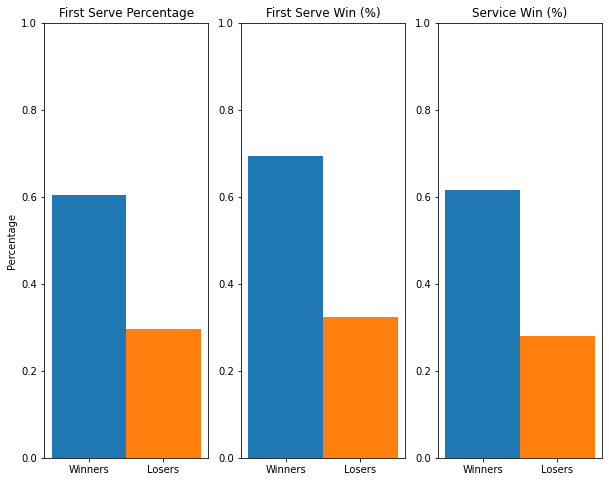

In [382]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (10,8))
width = 0.35


plot_winner_loser(ax1,
                  [p_stats.drop(losers)["first_serve_pct"].mean(),
                   p_stats.loc[losers, "first_serve_pct"].mean()])

ax1.set_title("First Serve Percentage")
ax1.set_ylabel("Percentage")
ax1.set_xticks([0, width])
ax1.set_xticklabels(["Winners", "Losers"])

plot_winner_loser(ax2,
                  [p_stats.drop(losers)["first_serve_win_pct"].mean(),
                   p_stats.loc[losers, "first_serve_win_pct"].mean()])

ax2.set_title("First Serve Win (%)")
ax2.set_xticks([0, width])
ax2.set_xticklabels(["Winners", "Losers"])

plot_winner_loser(ax3,
                  [p_stats.drop(losers)["service_win_pct"].mean(),
                   p_stats.loc[losers, "service_win_pct"].mean()])

ax3.set_title("Service Win (%)")
ax3.set_xticks([0, width])
ax3.set_xticklabels(["Winners", "Losers"]);

In [383]:
p_stats["service_win_pct"].rank(ascending=False).astype(int)

Grigor Dimitrov           33
Kei Nishikori            182
Milos Raonic             326
Stan Wawrinka             36
Dominic Thiem            100
                        ... 
Denis Matsukevich        467
Artem Dubrivnyy          349
Karl Friberg             416
Viktor Galovic           344
Felix Auger-Aliassime    508
Name: service_win_pct, Length: 528, dtype: int64

In [384]:
p_stats.sort_values("service_win_pct", ascending=False).head(10)

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct
Marko Tepavac,tc11,0.582688,0.786476,0.766336
Nicolas Mahut,m873,0.801707,0.771930,0.759036
Lukas Rosol,r685,0.575782,0.825109,0.755435
Prajnesh Gunneswaran,ga94,0.652301,0.772988,0.703778
Daniel Brands,bc72,0.686522,0.754136,0.699684
Nikola Mektic,mf09,0.611963,0.750965,0.691033
Roberto Carballes Baena,cf59,0.627221,0.786255,0.686139
Bradley Klahn,ka98,0.640961,0.759451,0.683974
Bjorn Fratangelo,f811,0.614551,0.735709,0.683538
Pedja Krstin,kd70,0.675139,0.743024,0.680518


In [385]:
p_stats.sort_values("first_serve_win_pct", ascending=False).head(10)

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct
Lukas Rosol,r685,0.575782,0.825109,0.755435
Steven Diez,d916,0.547936,0.818065,0.675018
Alexander Sarkissian,sl07,0.546852,0.799060,0.663789
Grega Zemlja,z189,0.505902,0.793972,0.644614
Brian Baker,ba23,0.593762,0.792555,0.667885
Marko Tepavac,tc11,0.582688,0.786476,0.766336
Roberto Carballes Baena,cf59,0.627221,0.786255,0.686139
Joao Pedro Sorgi,sk69,0.663199,0.785512,0.667727
Daniil Medvedev,mm58,0.537462,0.784017,0.666104
Mathias Bourgue,bk19,0.583916,0.782909,0.669307


In [386]:
p_stats.sort_values("first_serve_pct", ascending=False).head(10)

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct
Nicolas Mahut,m873,0.801707,0.771930,0.759036
Yannick Maden,mh16,0.749806,0.441959,0.448042
Dennis Novak,db59,0.737892,0.640412,0.640313
Paul-Henri Mathieu,m850,0.737313,0.648563,0.570832
Konstantin Kravchuk,k776,0.706731,0.635772,0.585737
Lorenzo Giustino,ga79,0.703534,0.715851,0.654923
Thomas Fabbiano,f586,0.697625,0.564428,0.534174
Guido Andreozzi,a887,0.697202,0.684456,0.642104
Liam Broady,bi23,0.695048,0.690395,0.638056
Tatsuma Ito,i230,0.692716,0.727810,0.667527


In [387]:
p_stats.head()

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct
Grigor Dimitrov,d875,0.638913,0.772175,0.659111
Kei Nishikori,n552,0.567274,0.749315,0.615689
Milos Raonic,r975,0.540484,0.595305,0.495156
Stan Wawrinka,w367,0.551353,0.777774,0.658101
Dominic Thiem,tb69,0.563858,0.729184,0.638634


In [412]:
df_rankings

,Unnamed: 0,rank,age,player,player_id,rank_change
0,0,1,31.0,rafael-nadal,n409,5
1,1,2,36.0,roger-federer,f324,8
2,2,3,26.0,grigor-dimitrov,d875,10
3,3,4,20.0,alexander-zverev,z355,18
4,4,5,24.0,dominic-thiem,tb69,3
...,...,...,...,...,...,...
1995,1995,1994,22.0,keisuke-numajiri,n717,-791
1996,1996,1997,20.0,andrej-glvac,g09d,0
1997,1997,1997,26.0,victor-nunez,n583,-721
1998,1998,1999,20.0,isa-mammetgulyyev,mv58,-779


In [432]:
df = pd.merge(p_stats, df_rankings, on='player_id')
df.drop(columns='Unnamed: 0', inplace=True)

df = df.sort_values('rank')

def name(player):
    player = player.split('-')
    return player[0].capitalize() + ' ' + player[1].capitalize()

df['player'] = df['player'].apply(name)

In [442]:
df.set_index('player', inplace=True)

In [446]:
df['cluster_rank'] = df['rank'].sort_values(ascending=False).values

In [447]:
df.head()

,player_id,first_serve_pct,first_serve_win_pct,service_win_pct,rank,age,rank_change,cluster_rank
player,,,,,,,,
Rafael Nadal,n409,0.574210,0.704473,0.624520,1,31.0,5,1124
Roger Federer,f324,0.665323,0.680556,0.610887,2,36.0,8,1044
Grigor Dimitrov,d875,0.638913,0.772175,0.659111,3,26.0,10,941
Alexander Zverev,z355,0.552293,0.756638,0.649309,4,20.0,18,841
Dominic Thiem,tb69,0.563858,0.729184,0.638634,5,24.0,3,808


In [473]:
df.iloc[0:20, 1:4].mean().to_frame().T

,first_serve_pct,first_serve_win_pct,service_win_pct
0,0.600132,0.694797,0.617019


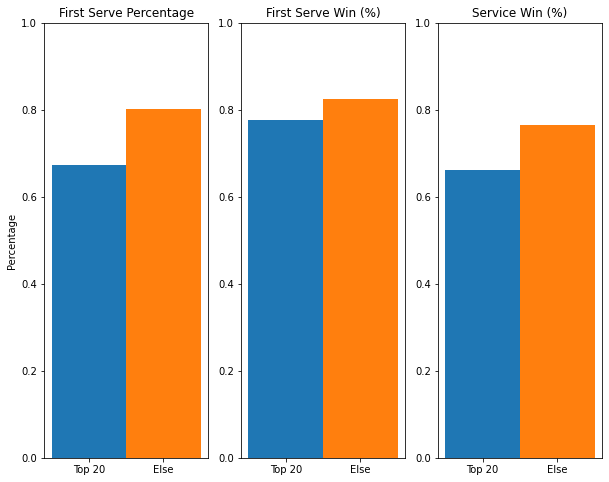

In [476]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (10,8))
width = 0.35


plot_winner_loser(ax1,
                  [df.iloc[0:20, 1],
                   df.iloc[20:, 1]])

ax1.set_title("First Serve Percentage")
ax1.set_ylabel("Percentage")
ax1.set_xticks([0, width])
ax1.set_xticklabels(["Top 20", "Else"])

plot_winner_loser(ax2,
                  [df.iloc[0:20, 2],
                   df.iloc[20:, 2]])

ax2.set_title("First Serve Win (%)")
ax2.set_xticks([0, width])
ax2.set_xticklabels(["Top 20", "Else"])

plot_winner_loser(ax3,
                  [df.iloc[0:20, 3],
                   df.iloc[20:, 3]])

ax3.set_title("Service Win (%)")
ax3.set_xticks([0, width])
ax3.set_xticklabels(["Top 20", "Else"]);

---

## Clustering